In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df= pd.read_csv ("kidney_d.csv")
df

,bp,sg,al,pc,pot,hemo,pcv,wc,rc,htn,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,normal,NaN,15.4,44,7800,5.2,yes,no,good,no,no,1
1,50.0,1.020,4.0,normal,NaN,11.3,38,6000,NaN,no,no,good,no,no,1
2,80.0,1.010,2.0,normal,NaN,9.6,31,7500,NaN,no,no,poor,no,yes,1
3,70.0,1.005,4.0,abnormal,2.5,11.2,32,6700,3.9,yes,no,poor,yes,yes,1
4,80.0,1.010,2.0,normal,NaN,11.6,35,7300,4.6,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,70.0,1.025,0.0,normal,4.5,14.3,43,6700,5.9,no,no,good,no,no,0
341,70.0,1.025,0.0,normal,5.0,13.4,41,7300,4.7,no,no,good,no,no,0
342,60.0,1.020,0.0,normal,4.2,15.0,50,7700,6.3,no,no,good,no,no,0
343,60.0,1.025,0.0,normal,4.1,16.2,50,5500,5.7,no,no,good,no,no,0


In [3]:
df.isnull().sum() 

bp                 12
sg                 46
al                 45
pc                 62
pot                87
hemo               51
pcv                69
wc                105
rc                130
htn                 2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [4]:
df.dtypes

bp                float64
sg                float64
al                float64
pc                 object
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
cad                object
appet              object
pe                 object
ane                object
classification      int64
dtype: object

In [5]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.isnull().sum() 

bp                  0
sg                  0
al                  0
pc                 62
pot                 0
hemo                0
pcv                69
wc                105
rc                130
htn                 2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
# data['Country']= label_encoder.fit_transform(data[‘Country'])


def handle_values (column_name):
    df[column_name]= label_encoder.fit_transform(df[column_name])
handle_values("pc")
handle_values("pcv")
handle_values("wc")
handle_values("rc")
handle_values("htn")
handle_values("cad")
handle_values("appet")
handle_values("pe")
handle_values("ane")



In [7]:
df


,bp,sg,al,pc,pot,hemo,pcv,wc,rc,htn,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,1,4.4,15.4,32,68,31,1,1,0,0,0,1
1,50.0,1.020,4.0,1,4.4,11.3,26,53,46,0,1,0,0,0,1
2,80.0,1.010,2.0,1,4.4,9.6,19,66,46,0,1,1,0,1,1
3,70.0,1.005,4.0,0,2.5,11.2,20,58,18,1,1,1,1,1,1
4,80.0,1.010,2.0,1,4.4,11.6,23,64,25,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,70.0,1.025,0.0,1,4.5,14.3,31,58,38,0,1,0,0,0,0
341,70.0,1.025,0.0,1,5.0,13.4,29,64,26,0,1,0,0,0,0
342,60.0,1.020,0.0,1,4.2,15.0,38,67,42,0,1,0,0,0,0
343,60.0,1.025,0.0,1,4.1,16.2,38,49,36,0,1,0,0,0,0


In [8]:
def handle_values (column_name):
    df[column_name].fillna(df[column_name].mode() [0],inplace=True)
handle_values("pc")
handle_values("pcv")
handle_values("wc")
handle_values("rc")
handle_values("htn")
handle_values("cad")
handle_values("appet")
handle_values("pe")
handle_values("ane")

In [9]:
df.isnull().sum()

bp                0
sg                0
al                0
pc                0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [10]:
#use IQR methode to handle outliers           
q1 = df['pot'].quantile(0.25)
q3 = df['pot'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr
#calculate upper and lower 
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit
#delete the outlier data
df.loc[(df['pot']>=upper_limit), 'pot'] = upper_limit
df.loc[(df['pot']<=lower_limit), 'pot'] = lower_limit



#use IQR methode to handle outliers           
q1 =df['bp'].quantile(0.25)
q3 = df['bp'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr
#calculate upper and lower 
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit
#delete the outlier data
df.loc[(df['bp']>=upper_limit), 'bp'] = upper_limit
df.loc[(df['bp']<=lower_limit), 'bp'] = lower_limit


In [11]:
features = ['bp','pot','sg','al','pc','hemo','pcv','wc','rc','htn','cad','appet','pe','ane']
X = df.loc[:, features]
y = df.loc[:, ['classification']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = .80)

In [12]:
# test_df = X_test
# train_df = X_train
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(276, 14)
(69, 14)
(276, 1)
(69, 1)


In [13]:
from sklearn.tree import DecisionTreeRegressor
# Initialize the classifiers
reg = DecisionTreeRegressor()

# Train the models on the training data
reg.fit(X_train, y_train)

# Predict on the test data
y_pred = reg.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy in %:",accuracy_score(y_test, y_pred)*100)
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision in %:",precision_score(y_test, y_pred)*100)
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall in %:",recall_score(y_test, y_pred)*100)
# Model Fmeasure: what percentage of positive tuples are labelled as such?
print("f measure in %:",f1_score(y_test, y_pred)*100)

Accuracy in %: 97.10144927536231
Precision in %: 98.11320754716981
Recall in %: 98.11320754716981
f measure in %: 98.11320754716981


In [14]:
from sklearn.linear_model import LogisticRegression
# Initialize the classifiers
lr = LogisticRegression()
# Train the models on the training data
lr.fit(X_train, y_train)
# Predict on the test data
y_pred = lr.predict(X_test)


# Model Accuracy: how often is the classifier correct?
print("Accuracy in %:",accuracy_score(y_test, y_pred)*100)
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision in %:",precision_score(y_test, y_pred)*100)
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall in %:",recall_score(y_test, y_pred)*100)
# Model Fmeasure: what percentage of positive tuples are labelled as such?
print("f measure in %:",f1_score(y_test, y_pred)*100)

Accuracy in %: 94.20289855072464
Precision in %: 100.0
Recall in %: 92.45283018867924
f measure in %: 96.07843137254902


In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifiers
knn = KNeighborsClassifier(n_neighbors=7)

# Train the models on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy in %:",accuracy_score(y_test, y_pred)*100)
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision in %:",precision_score(y_test, y_pred)*100)
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall in %:",recall_score(y_test, y_pred)*100)
# Model Fmeasure: what percentage of positive tuples are labelled as such?
print("f measure in %:",f1_score(y_test, y_pred)*100)

Accuracy in %: 88.40579710144928
Precision in %: 95.91836734693877
Recall in %: 88.67924528301887
f measure in %: 92.15686274509804


In [16]:
from sklearn.naive_bayes import GaussianNB
# training the model on training set
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# making predictions on the testing set
y_pred = gnb.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy in %:",accuracy_score(y_test, y_pred)*100)
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision in %:",precision_score(y_test, y_pred)*100)
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall in %:",recall_score(y_test, y_pred)*100)
# Model Fmeasure: what percentage of positive tuples are labelled as such?
print("f measure in %:",f1_score(y_test, y_pred)*100)


Accuracy in %: 94.20289855072464
Precision in %: 96.22641509433963
Recall in %: 96.22641509433963
f measure in %: 96.22641509433963


In [17]:
from sklearn.ensemble import RandomForestClassifier
# training the model on training set
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# making predictions on the testing set
y_pred = rf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy in %:",accuracy_score(y_test, y_pred)*100)
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision in %:",precision_score(y_test, y_pred)*100)
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall in %:",recall_score(y_test, y_pred)*100)
# Model Fmeasure: what percentage of positive tuples are labelled as such?
print("f measure in %:",f1_score(y_test, y_pred)*100)


Accuracy in %: 97.10144927536231
Precision in %: 96.36363636363636
Recall in %: 100.0
f measure in %: 98.14814814814815


In [18]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy in %:",accuracy_score(y_test, y_pred)*100)
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision in %:",precision_score(y_test, y_pred)*100)
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall in %:",recall_score(y_test, y_pred)*100)
# Model Fmeasure: what percentage of positive tuples are labelled as such?
print("f measure in %:",f1_score(y_test, y_pred)*100)


Accuracy in %: 98.55072463768117
Precision in %: 98.14814814814815
Recall in %: 100.0
f measure in %: 99.06542056074767


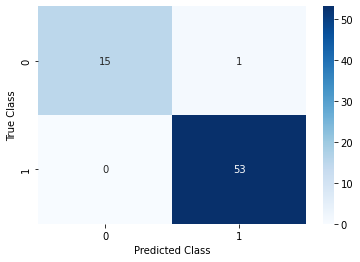

In [19]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pickle
rf=DecisionTreeClassifier()
with open('RF.pkl', 'wb') as f:
    pickle.dump(rf, f)


In [21]:
# from flask import Flask, render_template, request
# import numpy as np
# import pickle


# app = Flask(__name__)
# model = pickle.load(open('Kidney disease.pkl', 'rb'))

# @app.route('/',methods=['GET'])
# def Home():
#     return render_template('index(2).html')

# @app.route("/predict", methods=['POST'])
# def predict():
#     if request.method == 'POST':
#         bp = float(request.form['bp'])
#         sg = float(request.form['sg'])
#         hemo = float(request.form['hemo'])
#         pot = float(request.form['pot'])
#         al = float(request.form['al'])
#         appet = float(request.form['appet'])
#         rc = float(request.form['rc'])
#         pc = float(request.form['pc'])

#         values = np.array([[sg, htn, hemo, dm, al, appet, rc, pc]])
#         prediction = model.predict(values)

#         return render_template('result.html', prediction=prediction)


# if __name__ == "__main__":
#     app.run(debug=True)




# from flask import Flask, render_template, request
# import numpy as np
# import pickle


# app = Flask(__name__)
# model = pickle.load(open('Kidney.pkl', 'rb'))

# @app.route('/',methods=['GET'])
# def Home():
#     return render_template('index.html')

# @app.route("/predict", methods=['POST'])
# def predict():
#     if request.method == 'POST':
#         bp = float(request.form['bp'])
#         sg = float(request.form['sg'])
#         hemo = float(request.form['hemo'])
#         pot = float(request.form['pot'])
#         al = float(request.form['al'])
#         appet = float(request.form['appet'])
#         rc = float(request.form['rc'])
#         pc = float(request.form['pc'])

#         values = np.array([[sg, htn, hemo, dm, al, appet, rc, pc]])
#         prediction = model.predict(values)

#         return render_template('result.html', prediction=prediction)


# if __name__ == "__main__":
#     app.run(debug=True)


# import numpy as np
# import pandas as pd
# from flask import Flask, request, render_template
# import pickle

# app = Flask(__name__)
# model = pickle.load(open('model.pkl', 'rb'))

# @app.route('/')
# def home():
#     return render_template('index.html')

# @app.route('/predict',methods=['POST'])
# def predict():
#     input_features = [int(x) for x in request.form.values()]
#     features_value = [np.array(input_features)]

#     features_name = ['bp','sg','hemo','pot','al','appet','rc','pc']

#     df = pd.DataFrame(features_value, columns=features_name)
#     output = model.predict(df)

#     if output == 4:
#         res_val = "kidney disease"
#     else:
#         res_val = "no kidney disease"


#     return render_template('index.html', prediction_text='Patient has {}'.format(res_val))

# if __name__ == "__main__":
#     app.run()